In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [762]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

df = pd.concat([dfTrain, dfTest], ignore_index=True)
null_counts = df.isnull().sum()

print("Quantidade de valores nulos por coluna:")
print(null_counts)

Quantidade de valores nulos por coluna:
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


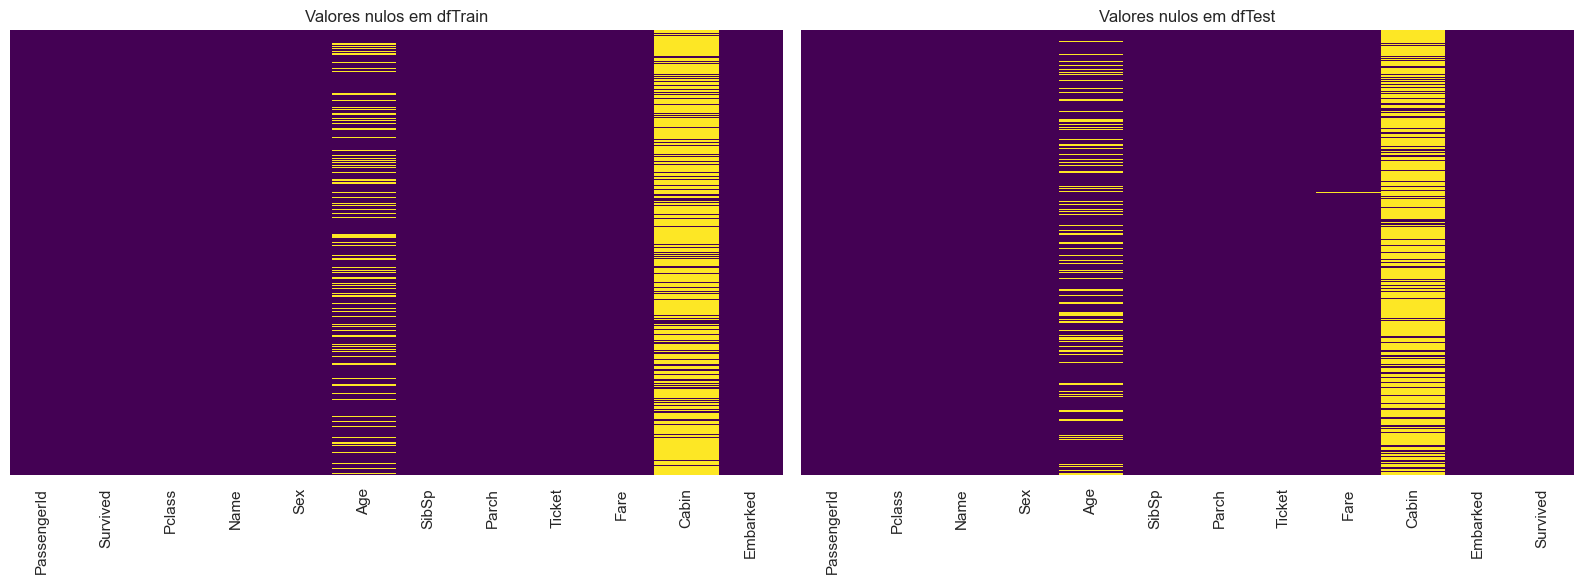

In [763]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for dfTrain
sns.heatmap(dfTrain.isnull(), cmap='viridis', cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title('Valores nulos em dfTrain')

# Heatmap for dfTest
sns.heatmap(dfTest.isnull(), cmap='viridis', cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title('Valores nulos em dfTest')


plt.tight_layout()
plt.show()

In [764]:
def questao1(dfEmbarcado):
    embarked_percentage = dfEmbarcado['Embarked'].value_counts(normalize=True) * 100
    
    # Definir um estilo de fundo branco e esquema de cores
    sns.set(style="whitegrid", palette="viridis")
    
    # Criar um gráfico de barras horizontal
    plt.figure(figsize=(10, 6))
    sns.barplot(x=embarked_percentage.values, y=embarked_percentage.index, hue=embarked_percentage.index, dodge=False, legend=False)
    
    # Adicionar rótulos e título
    plt.xlabel('Porcentagem')
    plt.ylabel('Porto de Embarque (Embarked)')
    plt.title('Porcentagem de cada item em Embarked')
    
    # Adicionar percentagens no gráfico
    for i, percentage in enumerate(embarked_percentage):
        plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=10)
    
    # Remover a borda superior e direita do gráfico
    sns.despine()
    
    # Exibir o gráfico
    plt.show()

In [765]:
def questao2(dfClasse):
    percentage_by_class = dfClasse['Pclass'].value_counts(normalize=True) * 100
    
    # Definir cores diferentes para cada classe
    colors = ['#FF9999', '#66B2FF', '#99FF99']  # Cores hexadecimais para tons pastéis
    # Aumentar o tamanho do gráfico
    plt.figure(figsize=(10, 6))
    
    # Criar o gráfico de barras horizontal invertendo a ordem dos índices
    plt.barh(percentage_by_class.index[::-1], percentage_by_class.values[::-1], color=colors)
    
    # Adicionar rótulos e título
    plt.xlabel('Porcentagem')
    plt.ylabel('Classe')
    plt.title('Porcentagem de Pessoas por Classe')
    
    # Adicionar as porcentagens ao lado de cada barra
    for index, value in enumerate(percentage_by_class.values[::-1]):
        plt.text(value, index, f'{value:.1f}%', va='center', fontsize=10)
    
    # Definir o fundo como branco
    plt.gca().set_facecolor('white')
    plt.gca().yaxis.grid(False)
    # Mostrar o gráfico
    plt.show()

In [766]:
def questao3(df):
    sibsp_counts = df['SibSp'].value_counts().sort_index()
    
    # Criar uma paleta de cores usando a paleta "viridis" do seaborn
    palette = sns.color_palette("viridis", len(sibsp_counts))
    
    # Plotar o gráfico usando a paleta de cores
    bars = plt.bar(sibsp_counts.index, sibsp_counts.values, color=palette)
    
    # Adicionar rótulos com o número total acima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    
    # Configurações do gráfico
    plt.title('Número de Irmãos e Cônjuges a Bordo do Titanic')
    plt.xlabel('Número de Irmãos e Cônjuges')
    plt.ylabel('Número de Passageiros')
    
    # Ajustar o intervalo do eixo X para evitar espaço em branco entre 5 e 8
    plt.xticks(range(min(sibsp_counts.index), max(sibsp_counts.index)+1))
    plt.gca().xaxis.grid(False)

    # Mostrar o gráfico
    plt.show()

In [767]:
def questao4(df):
    parch_counts = df['Parch'].value_counts().sort_index()
    
    palette = sns.color_palette("Set2", len(parch_counts))
    
    bars = plt.bar(parch_counts.index, parch_counts.values, color=palette)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    
    plt.title('Número de Pais/Filhos a Bordo do Titanic')
    plt.xlabel('Número de Pais/Filhos')
    plt.ylabel('Número de Passageiros')
    
    plt.xticks(range(min(parch_counts.index), max(parch_counts.index)+1))
    
    plt.legend(['Número de Parch'], loc='upper right')
    plt.gca().xaxis.grid(False)

    plt.show()

In [795]:
def questao5(df, missing_age_values):
    plt.figure(figsize=(12, 6))
    
    # Filtrar e pintar barras menores que 0 em azul
    sns.histplot(data=df[df['Age'] >= 0], x='Age', bins=30, kde=True, color='#6495ED', label='Número de Passageiros')  # Use '#6495ED' for a less saturated blue
    
    # Adicionar barras vermelhas para os valores de missing_age_values
    plt.hist(missing_age_values, bins=30, color='#FF0000', alpha=0.9, label='Idades Ausentes', width=2.3)  # Ajuste alpha para tornar a barra menos transparente
    
    # Adicionar linha para a média de idade
    mean_age = df['Age'].mean()
    
    # Configurações do gráfico
    plt.title('Número de Passageiros por Idade no Titanic')
    plt.xlabel('Idade')
    plt.ylabel('Número de Passageiros')
    plt.legend()
    plt.gca().xaxis.grid(False)

    # Mostrar o gráfico
    plt.show()

In [769]:
def questao6(dfTrain, dfTest):
    survived_counts_df = dfTrain['Survived'].value_counts()
    total_passengers_df = len(dfTrain)
    percentage_survived_df = survived_counts_df / total_passengers_df * 100
    
    survived_counts_teste = dfTest['Survived'].value_counts()
    total_passengers_teste = len(dfTest)
    percentage_survived_teste = survived_counts_teste / total_passengers_teste * 100
    
    
    # Aumentar o tamanho do gráfico
    plt.figure(figsize=(12, 8))
    
    # Definir largura das barras
    bar_width = 0.35
    
    # Criar o gráfico de barras empilhadas para df
    bars_df = plt.bar(np.arange(2) - bar_width/2, percentage_survived_df[::-1], bar_width, color='blue', alpha=0.7, label='df Treino')
    
    # Criar o gráfico de barras empilhadas para dfTeste
    bars_teste = plt.bar(np.arange(2) + bar_width/2, percentage_survived_teste[::-1], bar_width, color='green', alpha=0.7, label='df Teste')
    
    # Adicionar rótulos e título
    plt.ylabel('Percentual de Passageiros')
    plt.title('Comparação de Sobrevivência entre df e dfTeste')
    plt.xticks(np.arange(2), ['Sobreviveu', 'Não Sobreviveu'])
    
    # Adicionar a porcentagem acima de cada barra para df
    for bar, percentage in zip(bars_df, percentage_survived_df[::-1]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
                 ha='center', va='bottom', fontsize=10, color='white')
    
    # Adicionar a porcentagem acima de cada barra para dfTeste
    for bar, percentage in zip(bars_teste, percentage_survived_teste[::-1]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
                 ha='center', va='bottom', fontsize=10, color='white')
    
    # Adicionar o número absoluto acima de cada barra para df
    for bar, count in zip(bars_df, survived_counts_df[::-1]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{count} ({count / total_passengers_df * 100:.2f}%)', 
                 ha='center', va='bottom', fontsize=10)
    
    # Adicionar o número absoluto acima de cada barra para dfTeste
    for bar, count in zip(bars_teste, survived_counts_teste[::-1]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{count} ({count / total_passengers_teste * 100:.2f}%)', 
                 ha='center', va='bottom', fontsize=10)
    
    # Adicionar legenda
    plt.legend()
    plt.gca().xaxis.grid(False)

    # Mostrar o gráfico
    plt.show()

In [770]:
#Como existem valores nulos em embarked 
df['Embarked'].fillna('NI', inplace=True)
embarked_mapping = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown', 'NI': 'Não Informado' }
dfEmbarcado = df
dfEmbarcado['Embarked'] = df['Embarked'].map(embarked_mapping)

C:\Users\cotoq\AppData\Local\Temp\ipykernel_10144\3817730257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('NI', inplace=True)


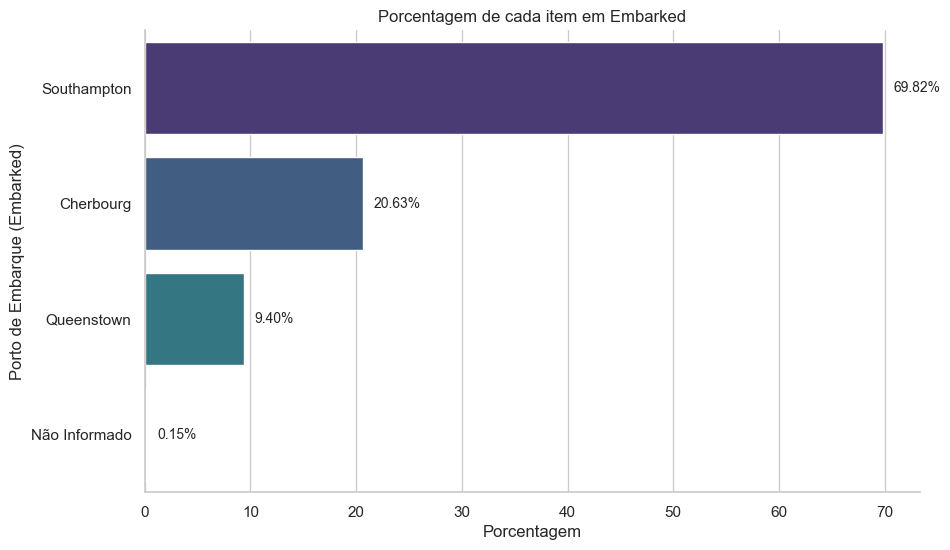

In [771]:
questao1(dfEmbarcado)

In [772]:
classe_mapping = {1: '1 classe', 2: '2 classe', 3: '3 classe'}
dfClasse = df
dfClasse['Pclass'] = dfClasse['Pclass'].map(classe_mapping)

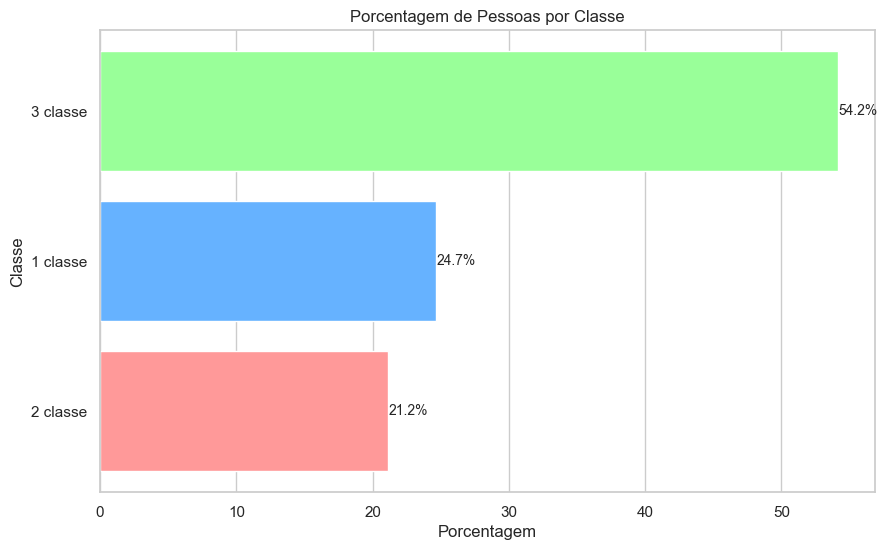

In [773]:
questao2(dfClasse)

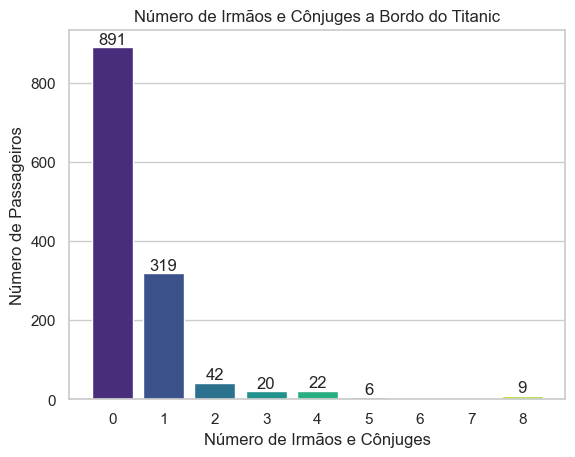

In [774]:
questao3(df)

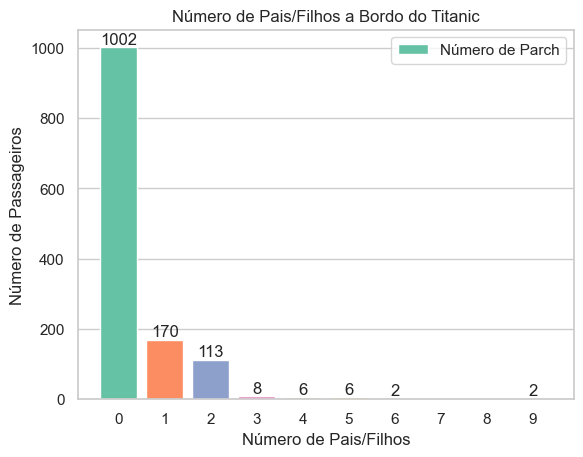

In [775]:
questao4(df)

In [776]:
missing_age_values = df['Age'][df['Age'].isna()].values
for i in range(len(missing_age_values)):
    missing_age_values[i] = -2

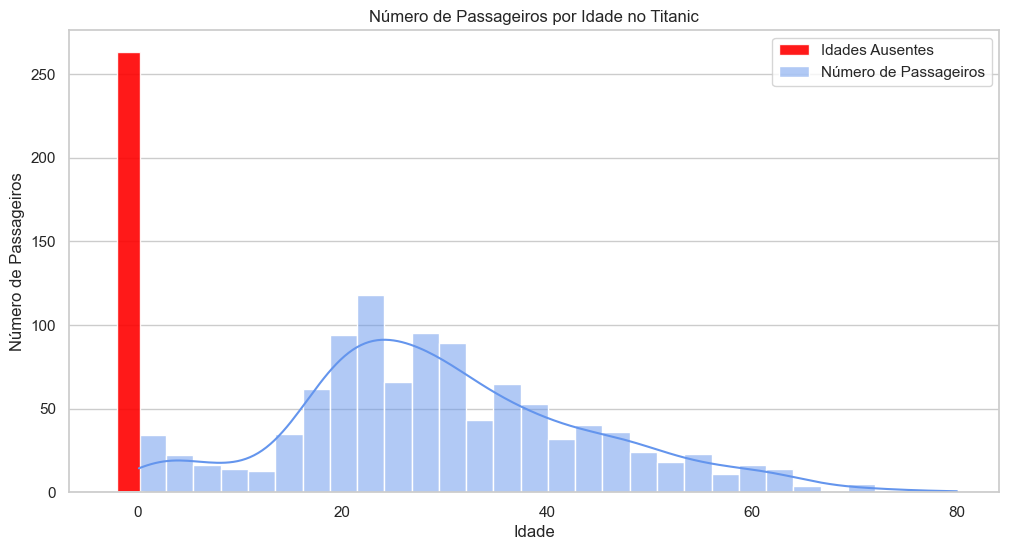

In [796]:
questao5(df, missing_age_values)

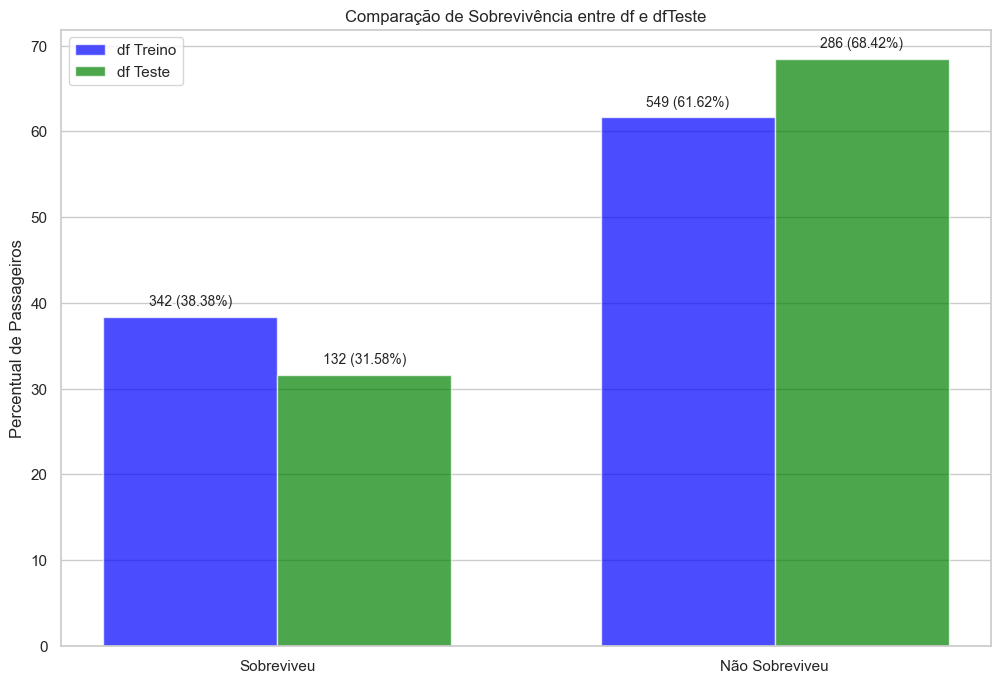

In [778]:
questao6(dfTrain, dfTest)

#Dois gráficos (semelhantes ao abaixo): um deles apresentando o
número de passageiros e o percentual que sobreviveram ou não por
classe. E, outro com o número dos que sobreviveriam ou morreriam
baseado nas sugestões que vocês encontraram!

In [779]:
classe_mapping = {1: '1 classe', 2: '2 classe', 3: '3 classe'}
dfTestClasse = dfTest
dfTestClasse['Pclass'] = dfTestClasse['Pclass'].map(classe_mapping)

dfTrainClasse = dfTrain
dfTrainClasse['Pclass'] = dfTrainClasse['Pclass'].map(classe_mapping)

In [780]:
survival_counts = dfTest.groupby(['Pclass', 'Survived']).size().unstack()

print("Número de passageiros que morreram e sobreviveram de cada classe:")
print(survival_counts)
c1Sobrevivencia = 58.87
c1Morreu = 1-c1Sobrevivencia

c2Sobrevivencia = 31.18
c2Morreu = 1-c1Sobrevivencia

c3Sobrevivencia = 18.34
c3Morreu = 1-c1Sobrevivencia

Número de passageiros que morreram e sobreviveram de cada classe:
Survived    0   1
Pclass           
1 classe   44  63
2 classe   64  29
3 classe  178  40


IndexError: index 3 is out of bounds for axis 0 with size 3

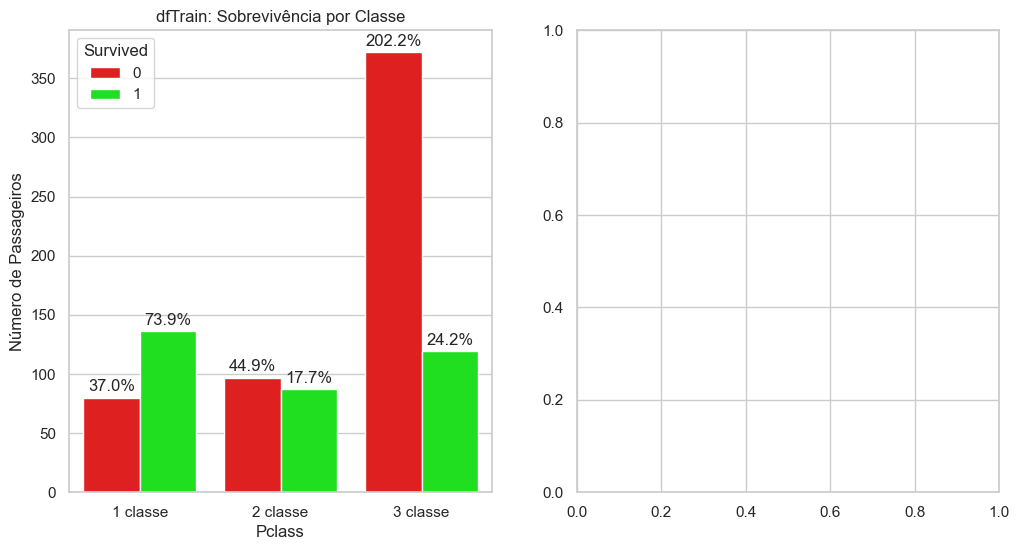

In [781]:
def add_percentage_labels(ax, total_counts):
    for i, p in enumerate(ax.patches):
        total_count = total_counts[i // 2]  # Dividido por 2 para evitar repetições
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 3,
                f'{height / total_count * 100:.1f}%',
                ha='center', va='bottom')

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Cores para "morreu" e "sobreviveu"
colors = ['#FF0000', '#00FF00']
palette = sns.color_palette(colors)

# Gráfico 1: Número de passageiros que sobreviveram ou não por classe no dfTrain
order_train = sorted(dfTrain['Pclass'].unique())
ax1 = sns.countplot(x='Pclass', hue='Survived', data=dfTrain, palette=palette, ax=axes[0], order=order_train)
axes[0].set_title('dfTrain: Sobrevivência por Classe')
axes[0].set_ylabel('Número de Passageiros')

# Adicionando porcentagens acima das barras no gráfico 1
total_passengers_train = dfTrain.groupby('Pclass')['Survived'].count().values
add_percentage_labels(ax1, total_passengers_train)

# Gráfico 2: Número de passageiros que sobreviveriam ou morreriam baseado no dfTest
order_test = sorted(dfTest['Pclass'].unique())
ax2 = sns.countplot(x='Pclass', hue='Survived', data=dfTest, palette=palette, ax=axes[1], order=order_test)
axes[1].set_title('dfTest: Sobrevivência por Classe')
axes[1].set_ylabel('Número de Passageiros')

# Adicionando porcentagens acima das barras no gráfico 2
total_passengers_test = dfTest.groupby('Pclass')['Survived'].count().values
add_percentage_labels(ax2, total_passengers_test)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [792]:
def menu():
    while True:
        print('Para sair digite nome = 0')
        try:
            nome = str(input('Digite o nome do embarcado: '))
            if nome == '0':
                break
            idade = int(input('Digite a idade da pessoa embarcada: '))
            if(idade < 0 ):
                continue
            classe = int(input('Digite a classe: '))
            if classe not in [1, 2, 3]:
                continue
            sexo = int(input('Digite o genêro:\n'
                             '1- mulher\n'
                             '2- homem \n'))
            if sexo not in [1, 2]:
                continue
            data = {'sexo': sexo, 'classe': classe, 'idade': idade}
            series_data = pd.Series(data)
            valor = regressaoLogistica(series_data)
            print(valor)
            if(valor >= 0.5):
                print(f"O passageiro {nome} sobreviveu ao Titanic!!!!!!")
            else:
                print(f"O passageiro {nome} infelizmente morreu :(")
        except:
            continue

In [793]:
menu()

Para sair digite nome = 0
Para sair digite nome = 0
Para sair digite nome = 0


In [789]:
def logistica(series):
    X = -1.33
    #Sexo
    if(series.iloc[0] == 1):
        X += 2.55
    #2 Classe
    if(series.iloc[1]== 2):
        X += 1.27
    #1 Classe
    if(series.iloc[1] == 1):
        X += 2.58
    X -= (0.04 * series.iloc[2])
    return X

def regressaoLogistica(series):
    exp = np.exp(logistica(series))
    return (exp/(1 + exp))